In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Leer Datos**

In [ ]:
dataset = pd.read_csv('GRUPO 1_1.csv', delimiter = "|", decimal=",")
# Convertir la variable objetivo a valores binarios (0=NO, 1=SI)
dataset["OBJ"] = dataset["OBJ"].map({"NO": 0, "SI": 1})

In [ ]:
dataset.shape

(10000, 66)

In [ ]:
dataset.head()

,ALEAT,ID,OBJ,V1,V2,V3,V4,V5,V6,V7,...,V22_P,V23_P,V24_P,V25_P,V26_P,V27_P,V28_P,V29_P,V30_P,V31_P.1
0,1.13779678993756E-05,279403833,0,0.000000,0.000000,0.000000,11.991000,0.253845,0.000000,0.000000,...,0.000000,0.026359,0.282127,0.000000,0.000000,0.000000,0.000000,0.507707,0.000000,0.000577
1,2.07968987621353E-05,278970977,0,0.020430,6.621791,0.000000,1.545208,116.968217,19.232067,0.000000,...,0.000007,0.201098,0.016155,0.000014,0.000000,0.000000,0.000000,0.741277,0.000000,0.000690
2,3.36207449592747E-05,266714141,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.117024,0.696280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.58200632202532E-05,278047301,0,0.000000,0.039873,0.000000,0.225174,84.001848,0.104324,0.000000,...,0.000028,0.090584,0.042693,0.000000,0.000000,0.000000,0.000000,0.706128,0.000000,0.004855
4,4.50573861808783E-05,334324292,0,0.000000,5.223464,0.000000,131.933357,130.280795,3.020154,0.044157,...,0.000180,0.257948,0.134969,0.000003,0.000000,0.000000,0.000965,0.397722,0.000000,0.017215


# **Analisis Exploratorio de los Datos**

In [ ]:
from sklearn.feature_selection import f_classif

feature_columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10",
                   "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20",
                   "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "V29", "V30"]

vars_relativas = ['V1_p','V2_p','V3_p','V4_p','V5_p','V6_p','V7_p','V8_p','V9_p','V10_p',
                  'V11_p','V12_p','V13_p','V14_p','V15_p','V16_p','V17_p','V18_p','V19_p','V20_p',
                  'V21_p','V22_p','V23_p','V24_p','V25_p','V26_p','V27_p','V28_p','V29_p','V30_p']

# Definir variables independientes (X) y variable objetivo (y)
X = dataset[feature_columns]

y = dataset["OBJ"]

## **ANOVA**

In [ ]:
# Aplicar ANOVA F-test
f_values, p_values = f_classif(X, y)

anova_results = pd.DataFrame({"Variable": feature_columns, "F-Value": f_values, "P-Value": p_values})
anova_results.sort_values(by="P-Value", ascending=True, inplace=True)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Nota: Features [13] are constant ver => V14, el contador empieza en 0 por eso la V14 es la señalada

In [ ]:
X[[ "V13", "V14", "V15"]].describe()
# Se puede obviar la 14 del entrenamiento toda la columna es 0

,V13,V14,V15
count,10000,10000,10000
unique,6591,1,983
top,0.000000,0.000000,0.000000
freq,2833,10000,8994


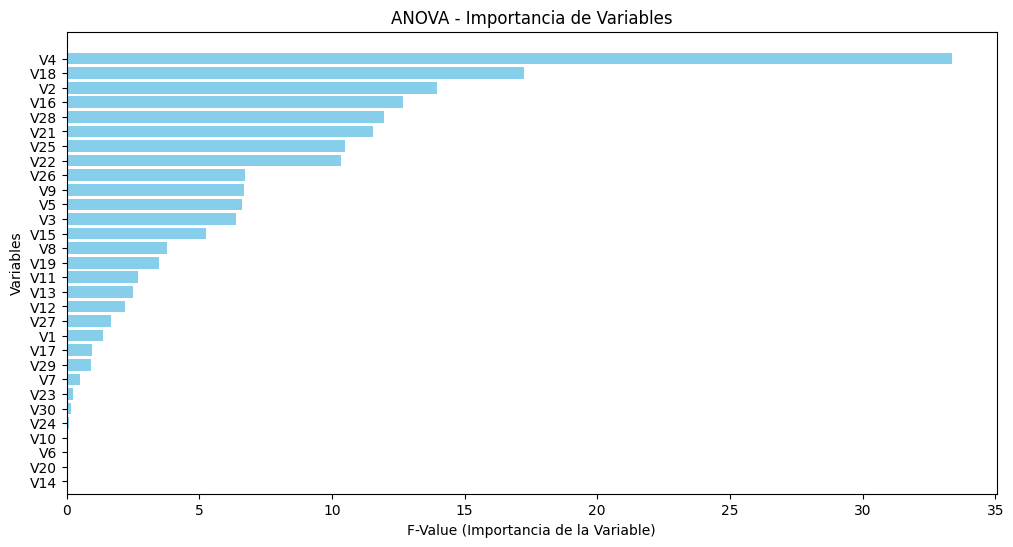

In [ ]:
import matplotlib.pyplot as plt

# Graficar los valores F en orden descendente
plt.figure(figsize=(12, 6))
plt.barh(anova_results["Variable"], anova_results["F-Value"], color='skyblue')
plt.xlabel("F-Value (Importancia de la Variable)")
plt.ylabel("Variables")
plt.title("ANOVA - Importancia de Variables")
plt.gca().invert_yaxis()
plt.show()

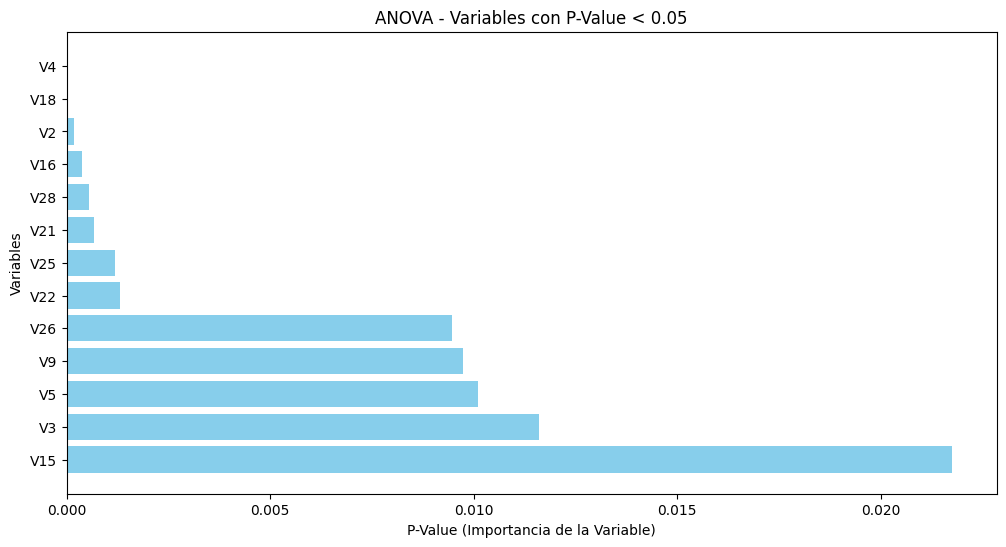

In [ ]:
# Filtrar solo las variables con p-value < 0.05
anova_results_filtered = anova_results[anova_results["P-Value"] < 0.05]

# Graficar solo las variables significativas
plt.figure(figsize=(12, 6))
plt.barh(anova_results_filtered["Variable"], anova_results_filtered["P-Value"], color='skyblue')
plt.xlabel("P-Value (Importancia de la Variable)")
plt.ylabel("Variables")
plt.title("ANOVA - Variables con P-Value < 0.05")
plt.gca().invert_yaxis()  # Invertir el eje Y para mejor visualización
plt.show()


# **Separacion del Data Set**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
feature_columns = ["V4", "V18", "V2", "V16", "V28", "V21", "V25", "V22", "V26", "V9", "V5", "V3", "V15"]

## **Normalizar Datos para feature_columns**

In [ ]:
scaler = StandardScaler()
X_ANOVA = dataset[feature_columns]
y = dataset["OBJ"]
X_scaled_ANOVA = scaler.fit_transform(X_ANOVA)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_ANOVA, y, test_size=0.3,random_state=0)

In [ ]:
y.value_counts()

,count
OBJ,
0,7381
1,2619


# **Modelo de Regresion Logistica**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score

## **Con Las Variables Independientes ANOVA**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo base sin especificar el penalty
clasif = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')

# Definir la grilla de hiperparámetros
grid_val = {
    'C': [1, 5, 10, 15, 20],  # Valores de la regularización
    'penalty': ['l1', 'l2']   # Tipos de penalización
}

# Ejecutar GridSearchCV
grid_clas_ex = GridSearchCV(clasif, param_grid=grid_val, cv=3)
grid_clas_ex.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print('Mejor parámetro Grid (Máx Exactitud): ', grid_clas_ex.best_params_)
print('Mejor score Grid (Máx Exactitud): ', grid_clas_ex.best_score_)


Mejor parámetro Grid (Máx Exactitud):  {'C': 1, 'penalty': 'l2'}
Mejor score Grid (Máx Exactitud):  0.6712853947919847


In [ ]:
from sklearn.metrics import classification_report

clasif = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced', C=1, penalty='l2')
clasif.fit(X_train, y_train)
y_pred = clasif.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2216
           1       0.37      0.32      0.34       784

    accuracy                           0.68      3000
   macro avg       0.57      0.56      0.57      3000
weighted avg       0.67      0.68      0.67      3000



[[1802  414]
 [ 536  248]]


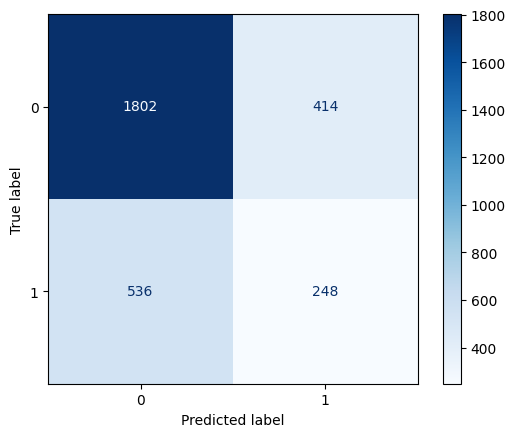

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Graficar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

## Conclusión
* El modelo funciona bien para la clase 0 pero mal para la clase 1.
* Recall bajo en la clase 1 significa que está ignorando muchas muestras de esta clase.
* Posible causa: Aunque usaste class_weight='balanced', el desbalance sigue afectando el rendimiento.

# **Probando con un modelo más complejo (Random Forest o XGBoost)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Definir el modelo con balanceo de clases
rf_clasif = RandomForestClassifier(n_estimators=5, class_weight='balanced', random_state=42)

# Entrenar el modelo
rf_clasif.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_clasif.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_rf))



              precision    recall  f1-score   support

           0       0.75      0.87      0.80      2216
           1       0.32      0.18      0.23       784

    accuracy                           0.69      3000
   macro avg       0.54      0.52      0.52      3000
weighted avg       0.64      0.69      0.65      3000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros para probar
param_grid = {
    'n_estimators': [50, 10],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Ejecutar GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print('Mejores parámetros:', grid_rf.best_params_)

# Evaluar el mejor modelo
y_pred_rf_best = grid_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf_best))


Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2216
           1       0.43      0.08      0.13       784

    accuracy                           0.73      3000
   macro avg       0.59      0.52      0.48      3000
weighted avg       0.66      0.73      0.66      3000



[[1650  566]
 [ 490  294]]


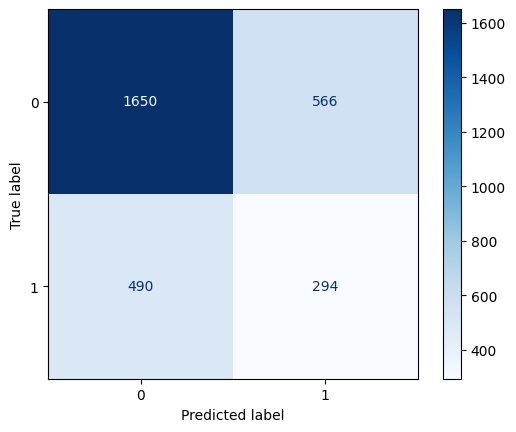

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf_best)
print(cm)
# Graficar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

¿Cómo arreglarlo?
Para reducir falsos negativos, debemos mejorar el recall de la clase 1:  Probemos SMOTE para equilibrar los datos antes de entrenar:

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Definir los hiperparámetros para probar
param_grid = {
    'n_estimators': [50, 10],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Ejecutar GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_rf.fit(X_train_resampled, y_train_resampled)

# Mostrar los mejores parámetros encontrados
print('Mejores parámetros:', grid_rf.best_params_)

# Evaluar el mejor modelo
y_pred_rf_best = grid_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf_best))

Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      2216
           1       0.34      0.38      0.36       784

    accuracy                           0.64      3000
   macro avg       0.55      0.56      0.55      3000
weighted avg       0.66      0.64      0.65      3000



[[1635  581]
 [ 489  295]]


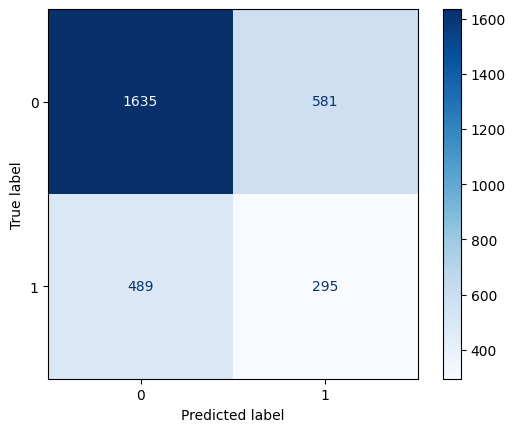

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf_best)
print(cm)
# Graficar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

clasif = LogisticRegression(max_iter=1000, solver='liblinear',  C=1, penalty='l2')
clasif.fit(X_train_resampled, y_train_resampled)
y_pred = clasif.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2216
           1       0.37      0.33      0.35       784

    accuracy                           0.68      3000
   macro avg       0.57      0.57      0.57      3000
weighted avg       0.67      0.68      0.67      3000

